In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from matplotlib.patches import Ellipse

In [2]:
sys.path.insert(0, '/home/aew492/research-summer2020/code')
import globals
globals.initialize_vals()

data_dir = globals.data_dir
grad_dir = globals.grad_dir

In [3]:
def grad_input(grad_dim, cat_tag, rlz=0, m=1, b=0.5):
    mock_dict = np.load(os.path.join(data_dir, f'gradient/{grad_dim}D/mock_data/{cat_tag}/{cat_tag}_rlz{rlz}_m-{m:.3f}-L_b-{b:.3f}.npy'), allow_pickle=True).item()
    return mock_dict['grad_expected']

In [4]:
def load_suave_amps(cat_tag, rlzs=401, m=1.0, b=0.5, grad_dim=1, basis='bao_iterative'):
    amps = np.empty((rlzs,4))
    grad_dir = f'/scratch/aew492/research-summer2020_output/gradient/{int(grad_dim)}D'
    for rlz in range(rlzs):
        suave_dict = np.load(os.path.join(grad_dir, f'suave_data/{cat_tag}/{basis}/{cat_tag}_rlz{rlz}_m-{m}00-L_b-{b}00.npy'), allow_pickle=True).item()
        amps[rlz] = suave_dict['amps']
    return amps

In [5]:
cat_tag = 'L750_n2e-4_z057_patchy_As2x'
m = 1
b = 0.5
L = 750

In [6]:
amps_1D = load_suave_amps(cat_tag, grad_dim=1, basis='bao_fixed')
amps_1D.shape

(401, 4)

In [7]:
grads_rec_1D = (amps_1D[:,1:].T/amps_1D[:,0].T).T
grads_rec_1D.shape

(401, 3)

In [8]:
# median recovered gradient, to center ellipse
grad_rec_1D_median = np.median(grads_rec_1D, axis=0)
grad_rec_1D_median

array([ 2.65086273e-03, -7.09578727e-05,  7.70090654e-06])

In [9]:
# standard deviations
stds_1D = np.std(grads_rec_1D, axis=0)
stds_1D.shape

(3,)

In [10]:
stds_1D

array([0.00029835, 0.00041961, 0.0004277 ])

In [11]:
grad_input_1D = grad_input(1, cat_tag)

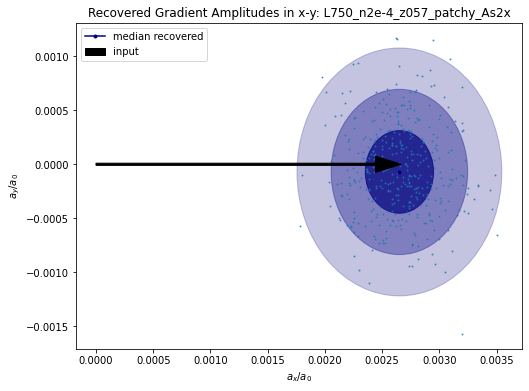

In [25]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(grads_rec_1D[:,0], grads_rec_1D[:,1], marker='.', markersize=2, ls='None', alpha=0.7)
ax.arrow(0,0,grad_input_1D[0], grad_input_1D[1], color='k', length_includes_head=True, width=0.00002, head_width=0.00015,label='input',zorder=100)
ax.plot(grad_rec_1D_median[0], grad_rec_1D_median[1], color='navy', marker='.', label='median recovered')
for i in range(1,4):
    ellipse = Ellipse(xy=(grad_rec_1D_median[0], grad_rec_1D_median[1]), width=i*2*stds_1D[0], height=i*2*stds_2D[1], color='navy', fill=True, alpha=0.7/i)
    ax.add_patch(ellipse)

ax.set_xlabel(r'$a_x / a_0$')
ax.set_ylabel(r'$a_y / a_0$')
ax.set_title(f'Recovered Gradient Amplitudes in x-y: {cat_tag}')
plt.legend()

### 2D

In [13]:
cat_tag = 'L750_n2e-4_z057_patchy_As2x'
m = 1
b = 0.5
L = 750

amps_2D = load_suave_amps(cat_tag, grad_dim=2, basis='bao_fixed')

In [14]:
grad_input_2D = grad_input(2, cat_tag)

In [15]:
grads_rec_2D = (amps_2D[:,1:].T/amps_2D[:,0].T).T
grads_rec_2D.shape

(401, 3)

In [16]:
# median recovered gradient, to center ellipse
grad_rec_2D_median = np.median(grads_rec_2D, axis=0)
grad_rec_2D_median

array([1.81916612e-03, 1.76614813e-03, 3.76735251e-05])

In [17]:
# standard deviations
stds_2D = np.std(grads_rec_2D, axis=0)
stds_2D.shape

(3,)

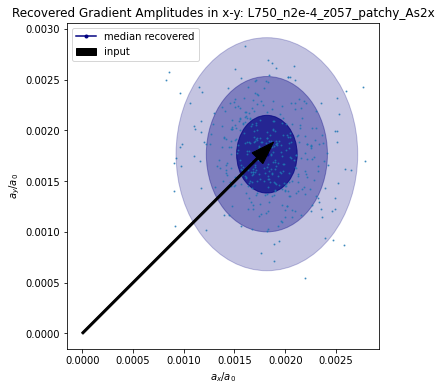

In [26]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(grads_rec_2D[:,0], grads_rec_2D[:,1], marker='.', markersize=2, ls='None', alpha=0.7)
ax.arrow(0,0,grad_input_2D[0], grad_input_2D[1], color='k', length_includes_head=True, width=0.00002, head_width=0.00015, label='input', zorder=100)
ax.plot(grad_rec_2D_median[0], grad_rec_2D_median[1], color='navy', marker='.', label='median recovered')
for i in range(1,4):
    ellipse = Ellipse(xy=(grad_rec_2D_median[0], grad_rec_2D_median[1]), width=i*2*stds_1D[0], height=i*2*stds_2D[1], color='navy', fill=True, alpha=0.7/i)
    ax.add_patch(ellipse)

ax.set_aspect('equal')
ax.set_xlabel(r'$a_x / a_0$')
ax.set_ylabel(r'$a_y / a_0$')
ax.set_title(f'Recovered Gradient Amplitudes in x-y: {cat_tag}')
plt.legend()